<a href="https://colab.research.google.com/github/lamiaakhairyibrahim/ITI_training/blob/main/DBSCAN_Class_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

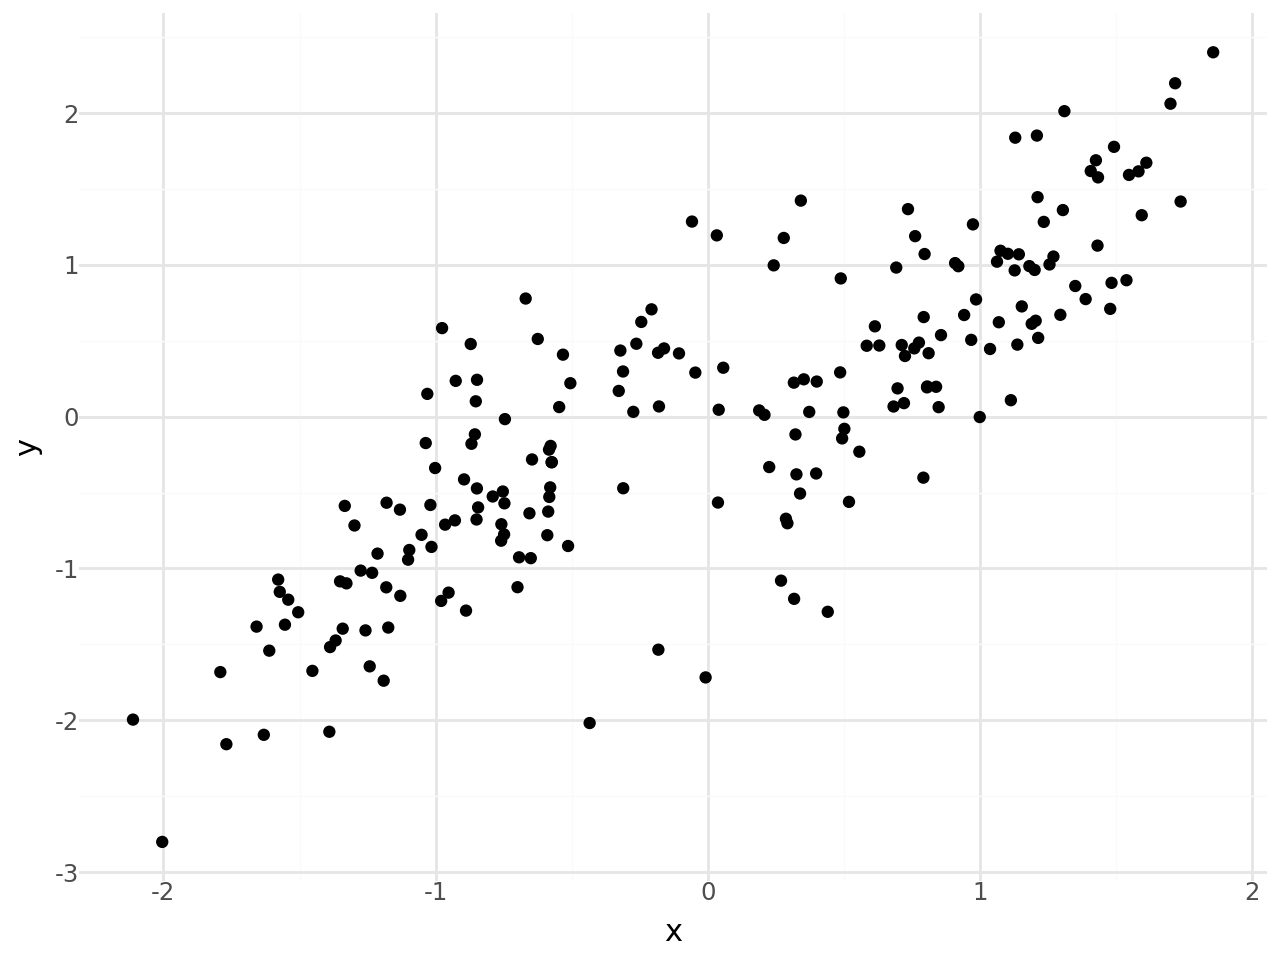

In [23]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

z = StandardScaler()
d1[["x","y"]] = z.fit_transform(d1)

ggplot(d1, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

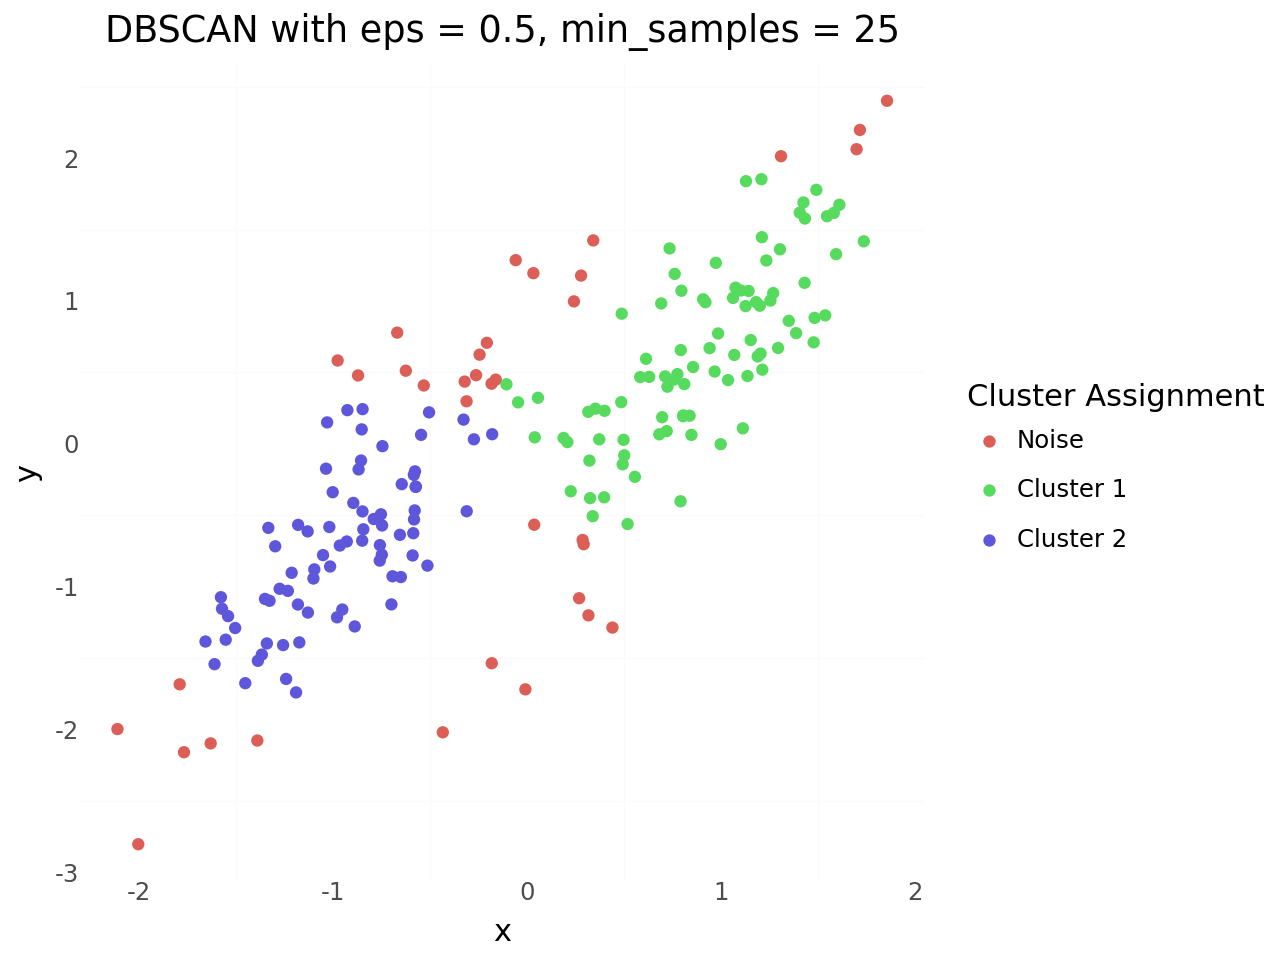

In [24]:
# dbscan and plot
# eps = 0.5, min_samples = 25
db1 = DBSCAN(eps = ...., min_samples = ....).fit(d1)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1.labels_)))]

d1["assignments"] = db1.labels_

(ggplot(d1, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 25"))

In [25]:
# grab only clustered data points
d1_clustered = d1.loc[(d1.assignments >= 0)]

silhouette_score(d1_clustered[["x","y"]], d1_clustered["assignments"])

np.float64(0.6169609560667532)

In [26]:
# overall
silhouette_score(d1[["x","y"]], d1["assignments"])

np.float64(0.39760284702143056)

## Dataset 2

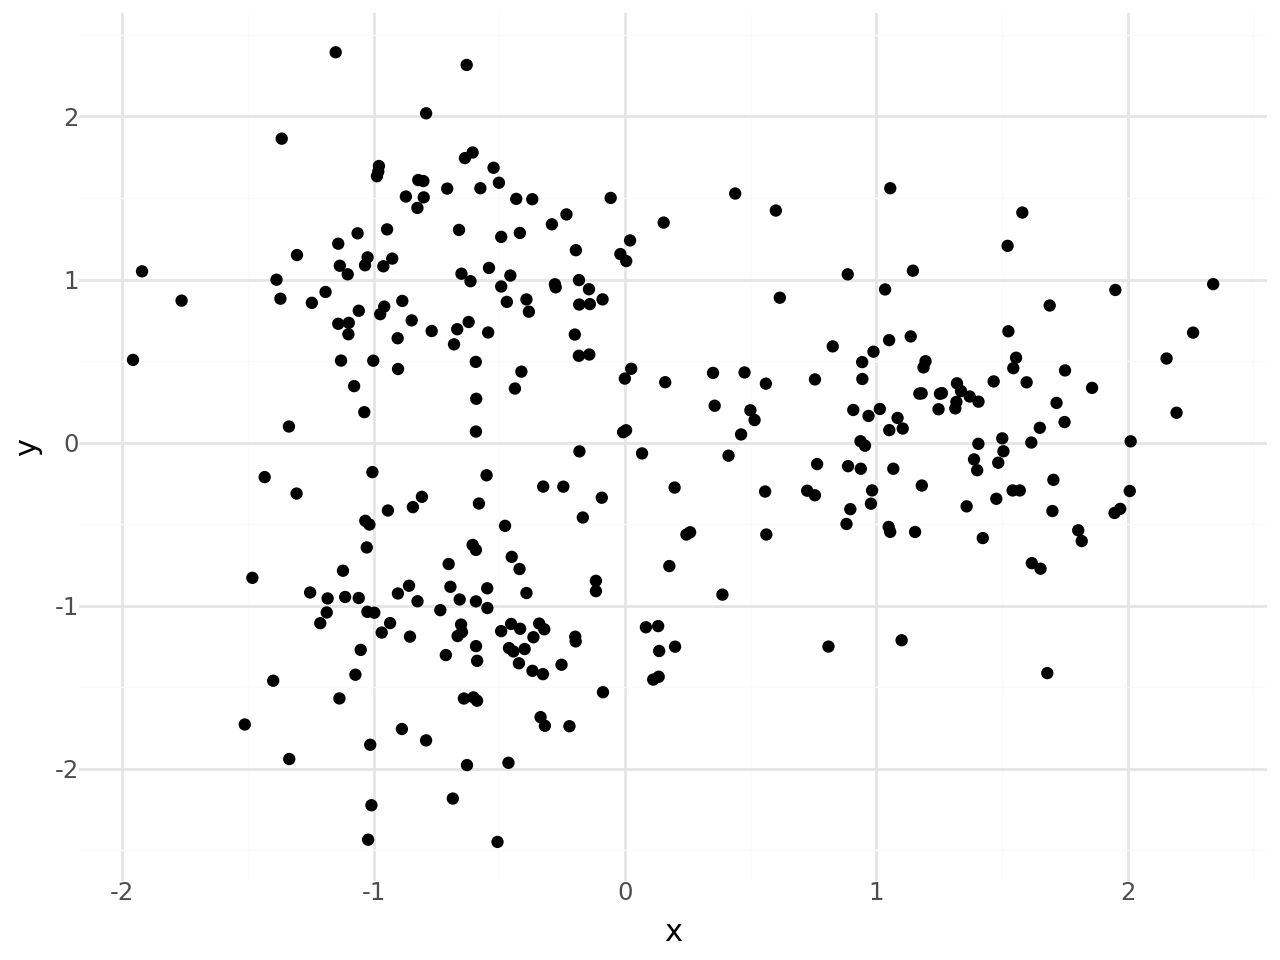

In [27]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")

z = StandardScaler()
d2[["x","y"]] = z.fit_transform(d2)

ggplot(d2, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

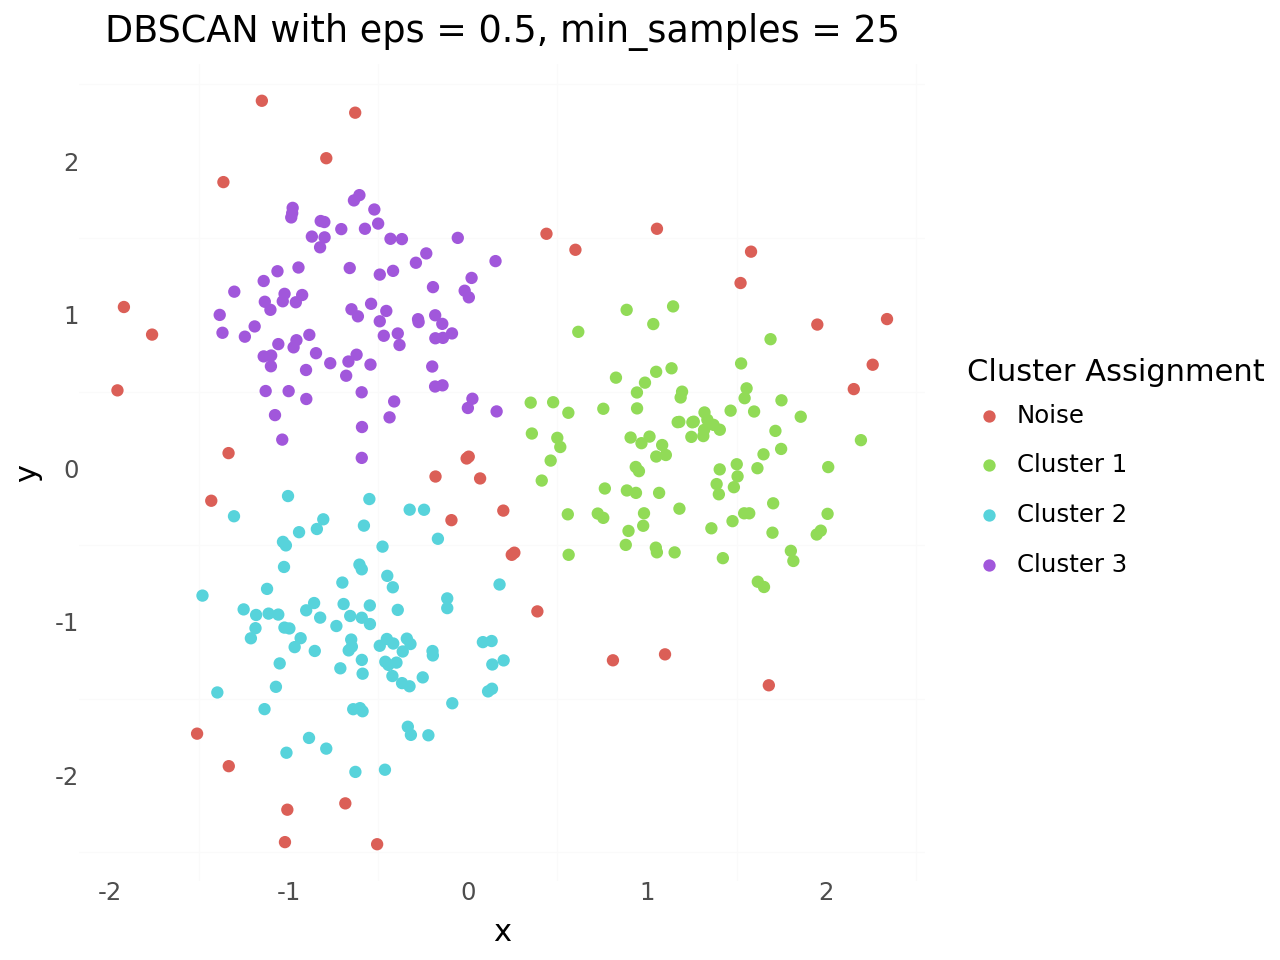

In [28]:
db2 = DBSCAN(eps = 0.5, min_samples = 25).fit(d2)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db2.labels_)))]

d2["assignments"] = db2.labels_
(ggplot(d2, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 25"))

In [29]:
# grab only clustered data points
d2_clustered = d2.loc[(d2.assignments >= 0)]

print(silhouette_score(d2_clustered[["x","y"]], d2_clustered["assignments"]))

# overall
print(silhouette_score(d2[["x","y"]], d2["assignments"]))

0.6140043544818719
0.4803831307840633


## Dataset 3

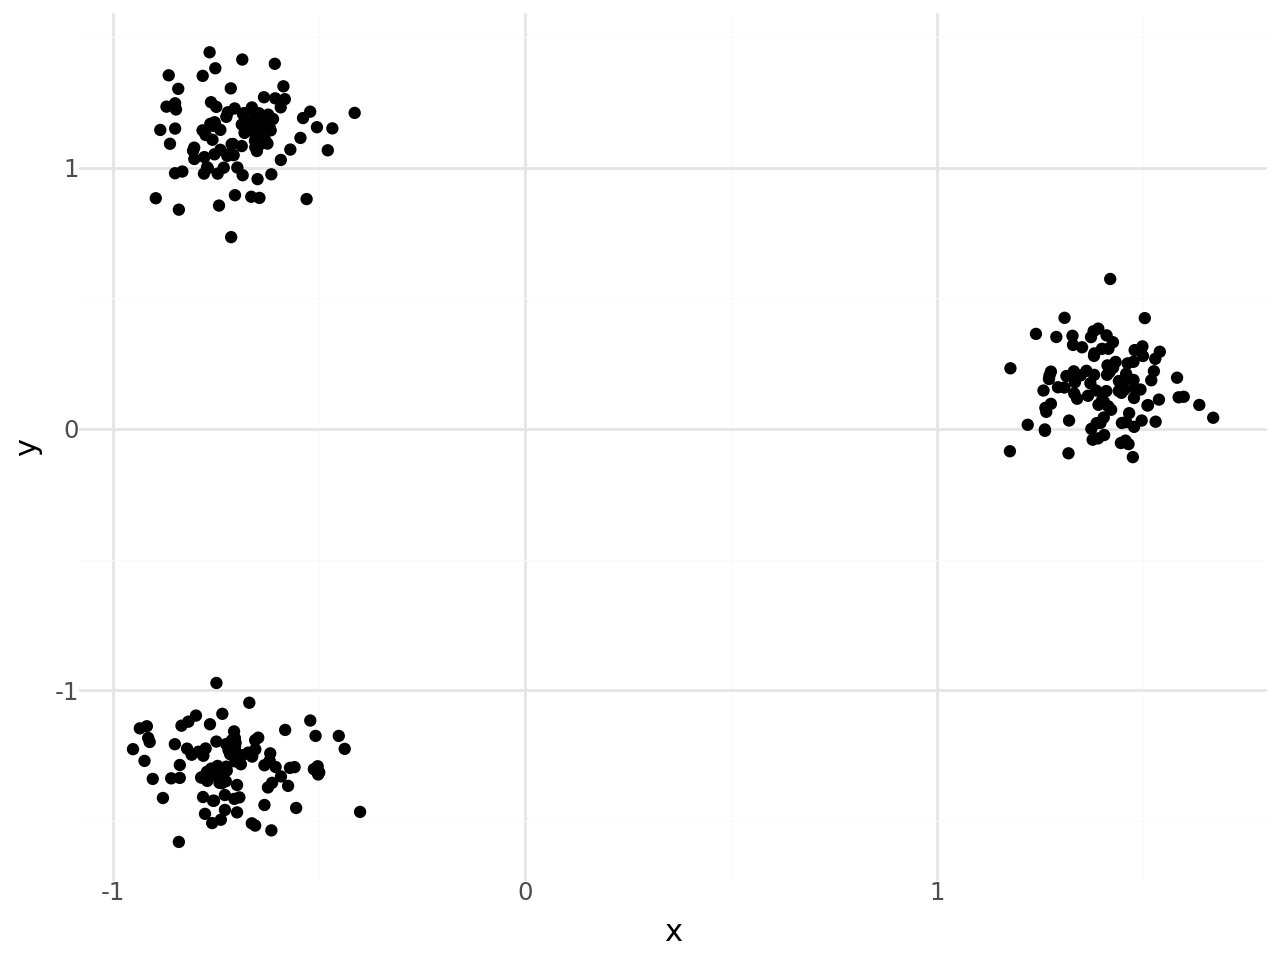

In [30]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")

z = StandardScaler()
d3[["x","y"]] = z.fit_transform(d3)

ggplot(d3, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

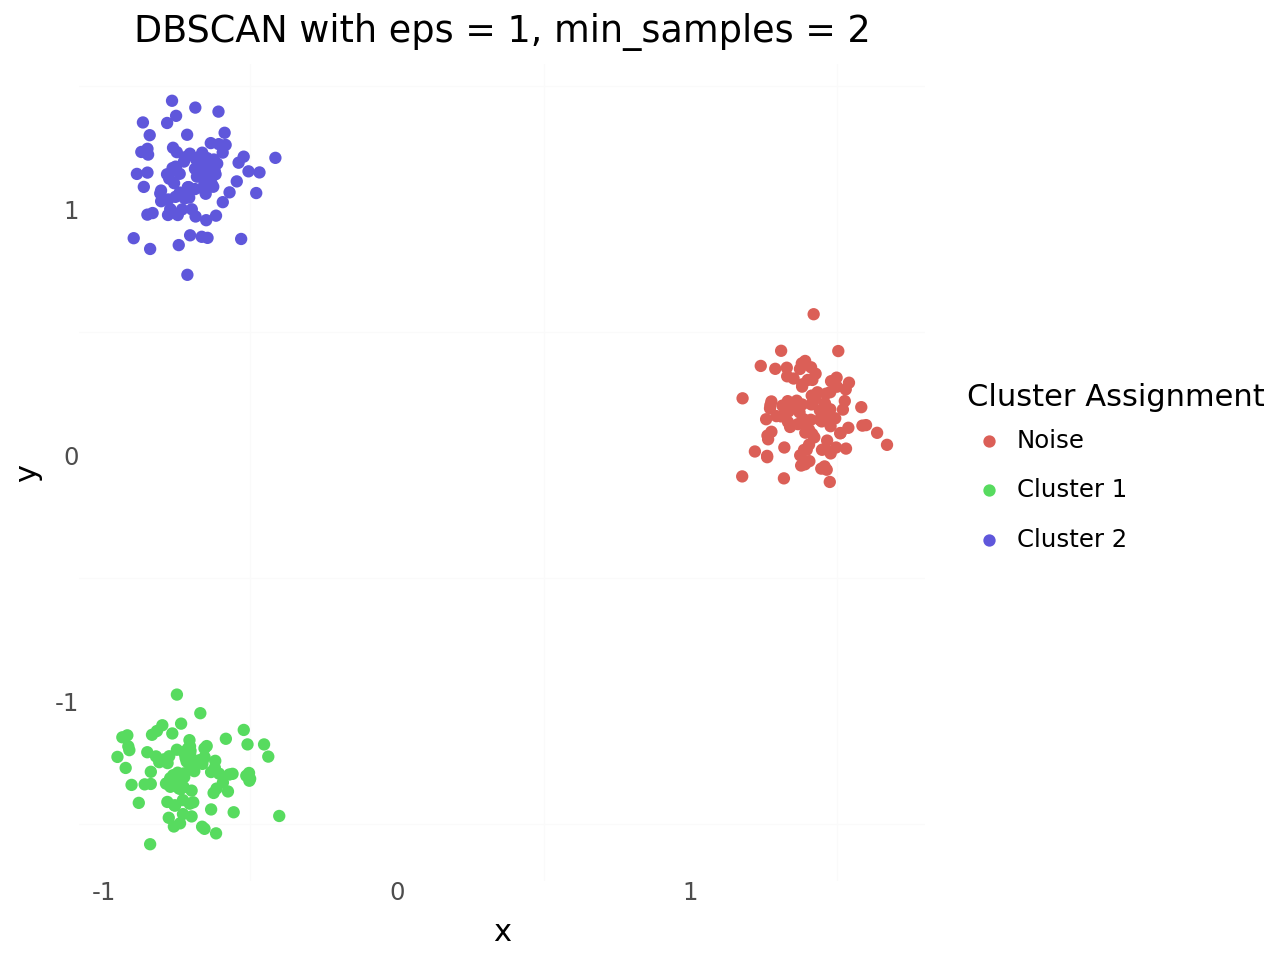

In [31]:
# eps = 1, min_samples = 2
db3 = DBSCAN(eps = ..., min_samples = ...).fit(d3)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db3.labels_)))]

d3["assignments"] = db3.labels_

(ggplot(d3, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 1, min_samples = 2"))

In [32]:
# grab only clustered data points
d3_clustered = d3.loc[(d3.assignments >= 0)]

print(silhouette_score(d3_clustered[["x","y"]], d3_clustered["assignments"]))

# overall
print(silhouette_score(d3[["x","y"]], d3["assignments"]))

0.913619050733588
0.913619050733588


## Dataset 4

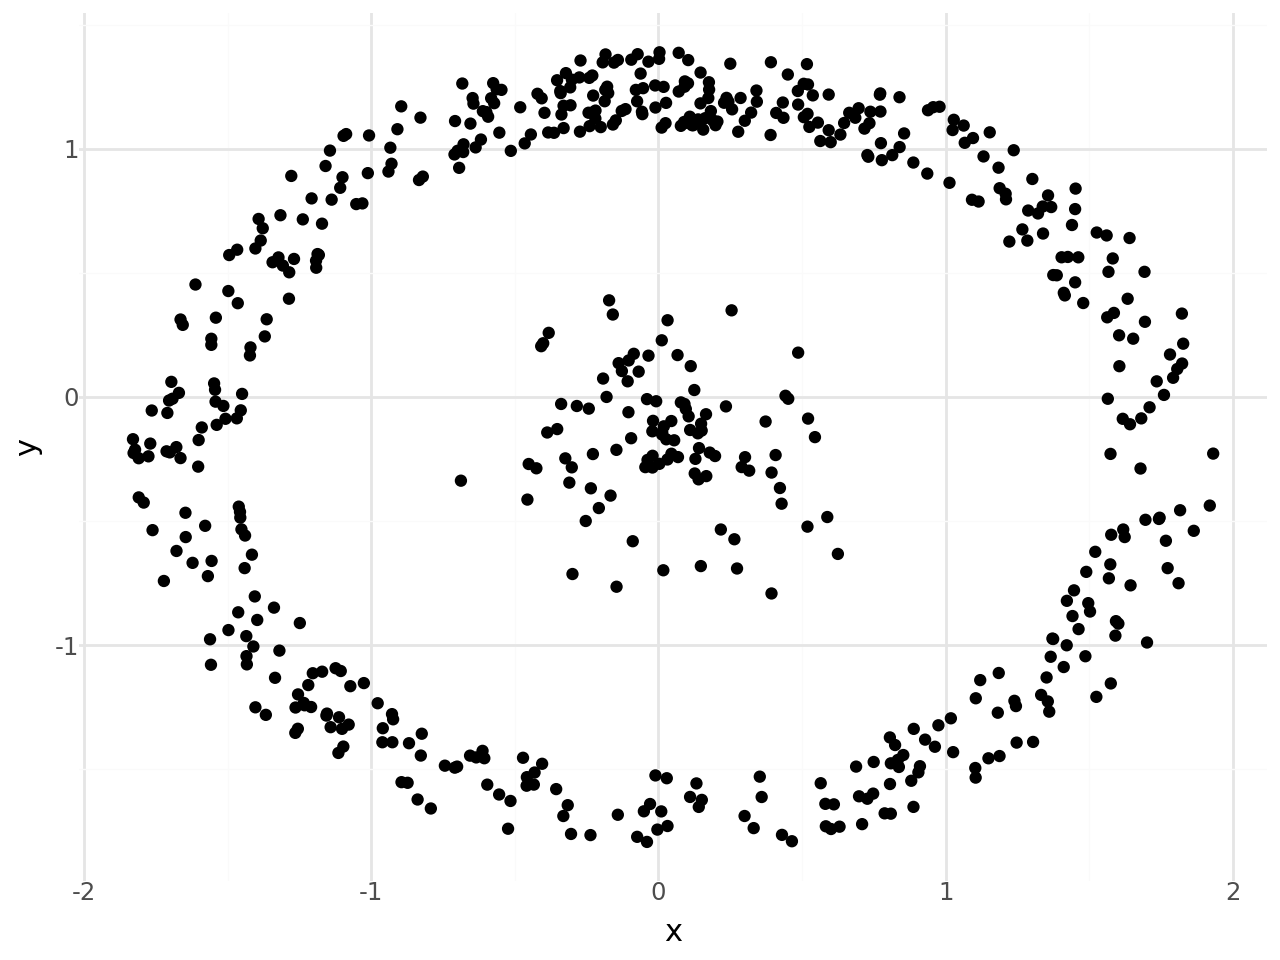

In [33]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")

z = StandardScaler()
d4[["x","y"]] = z.fit_transform(d4)

ggplot(d4, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

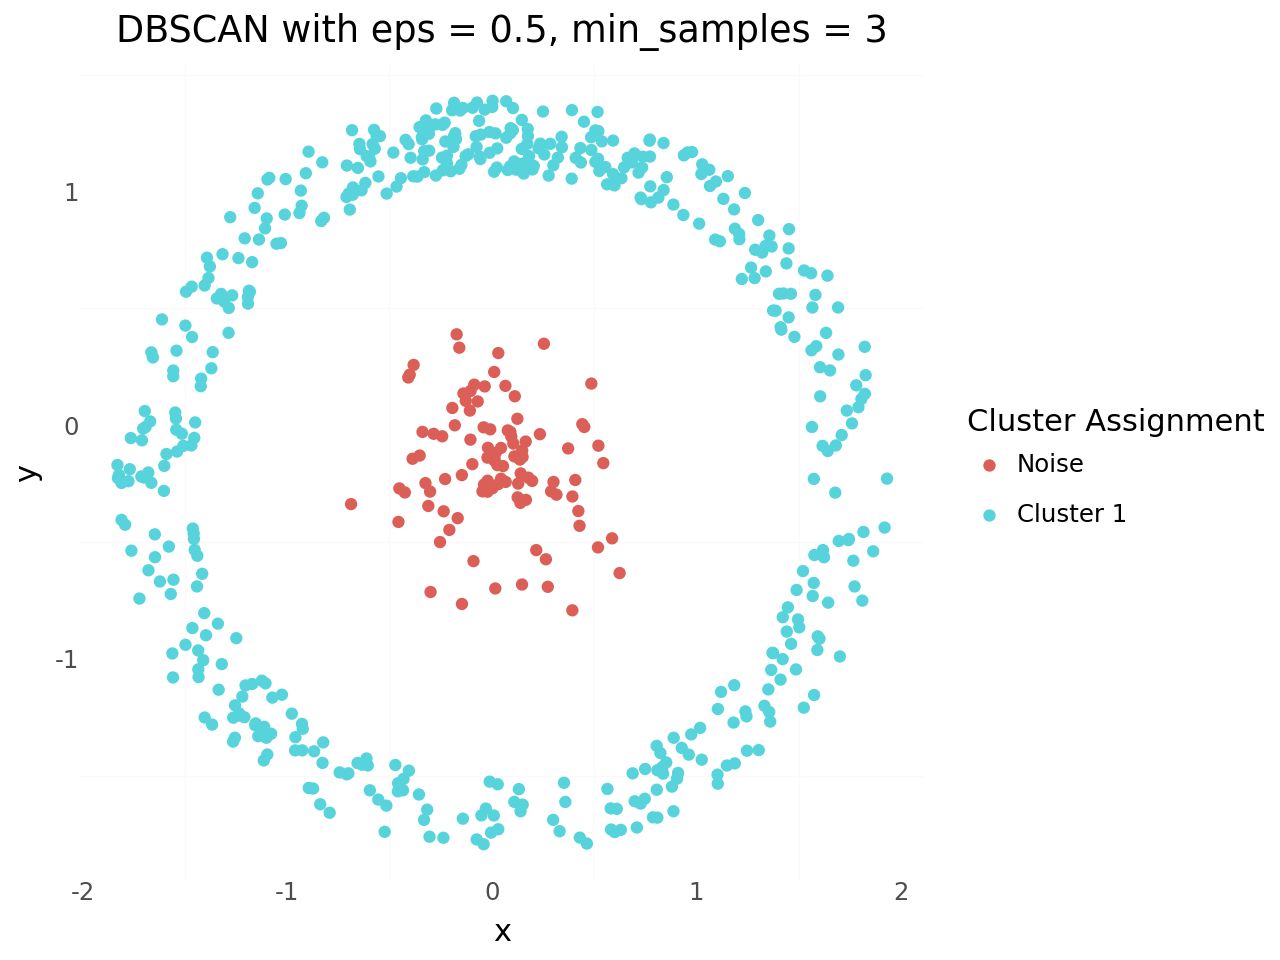

In [34]:
db4 = DBSCAN(eps = 0.5, min_samples = 3).fit(d4)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db4.labels_)))]

d4["assignments"] = db4.labels_

(ggplot(d4, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 3"))

In [35]:
# grab only clustered data points
d4_clustered = d4.loc[(d4.assignments >= 0)]

print(silhouette_score(d4_clustered[["x","y"]], d4_clustered["assignments"]))

# overall
print(silhouette_score(d4[["x","y"]], d4["assignments"]))

-0.042911477754913246
-0.042911477754913246


### Compare

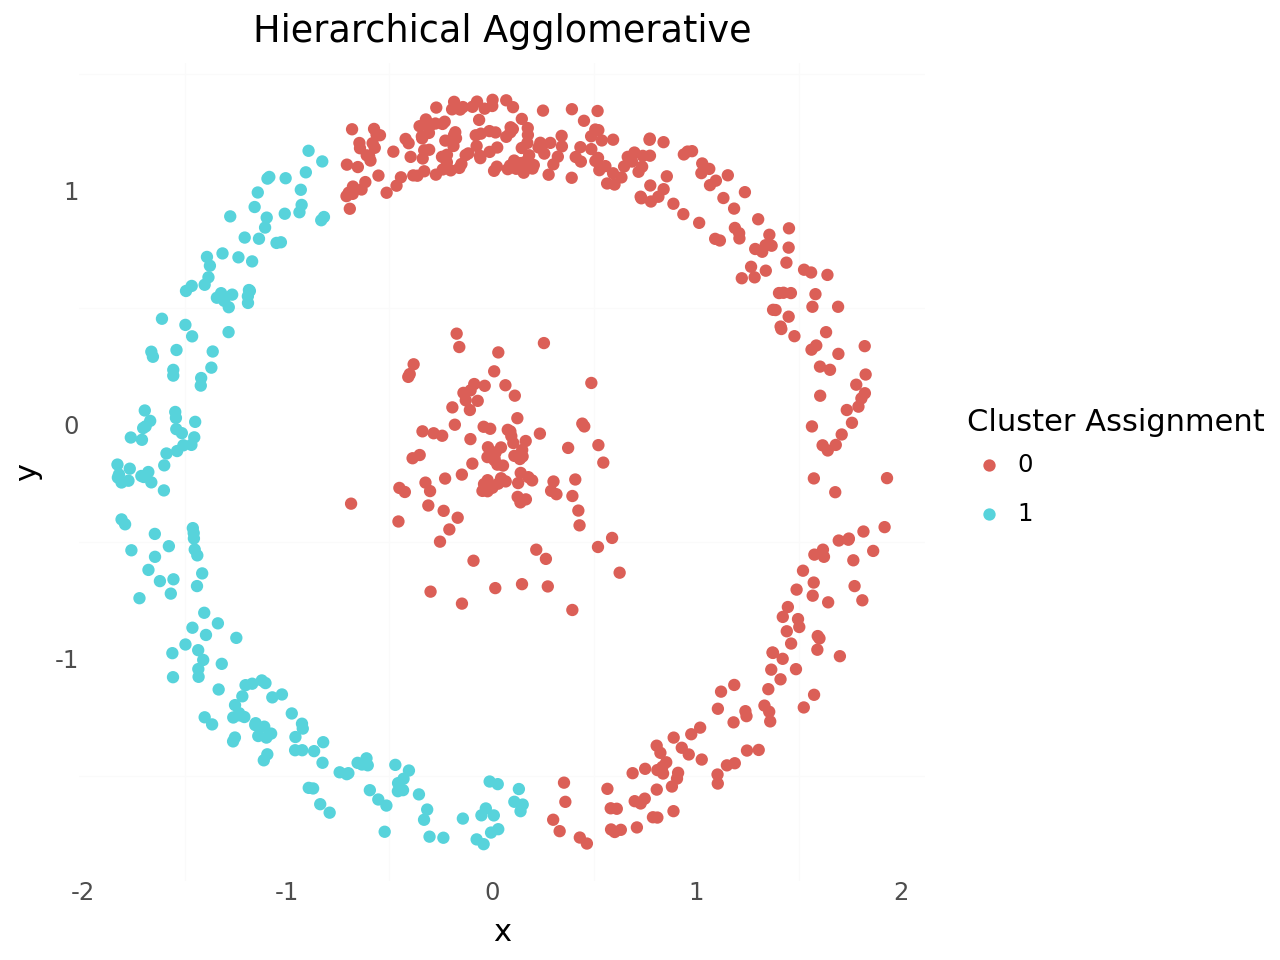

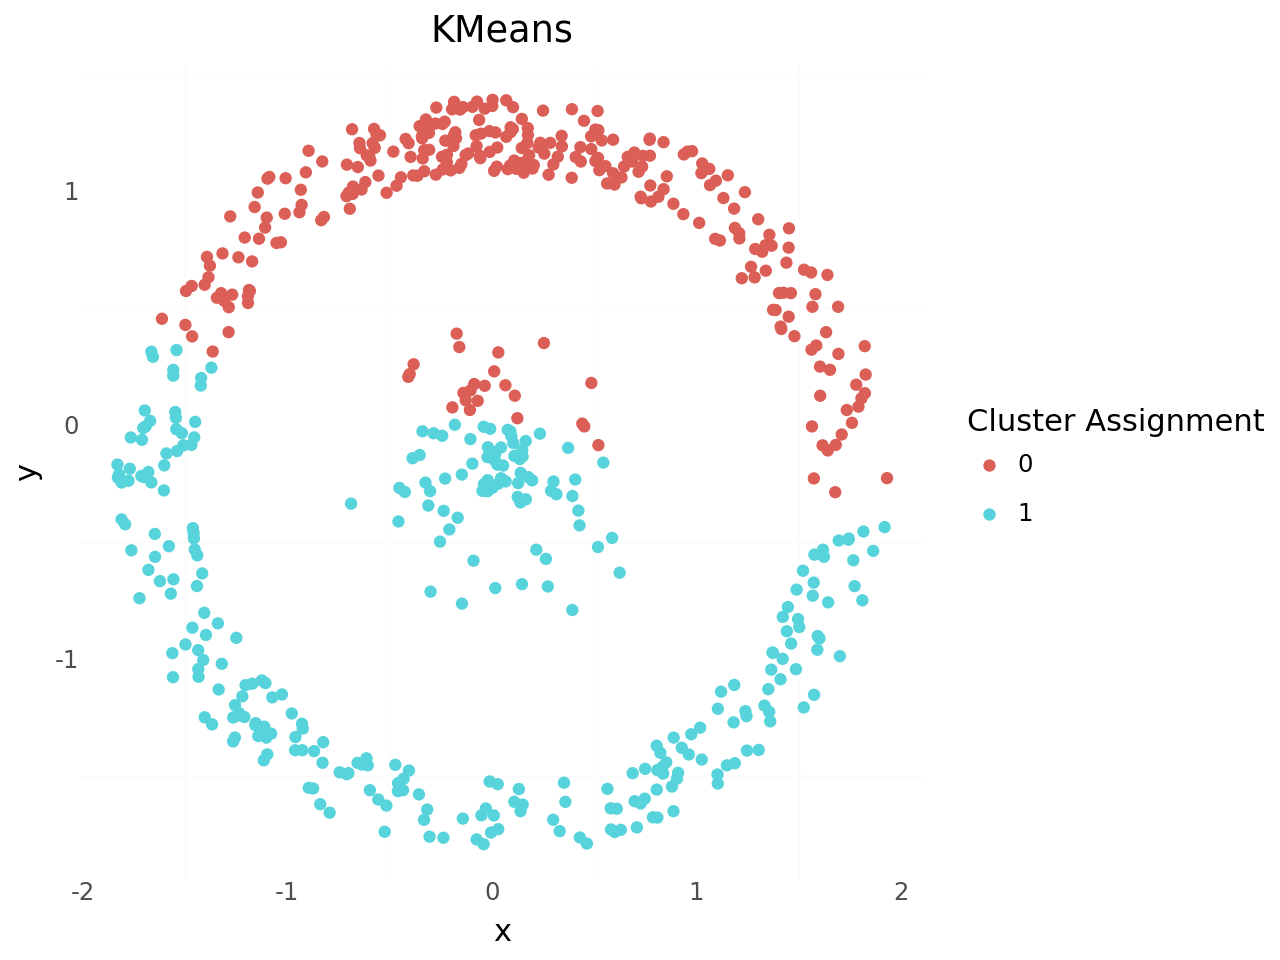

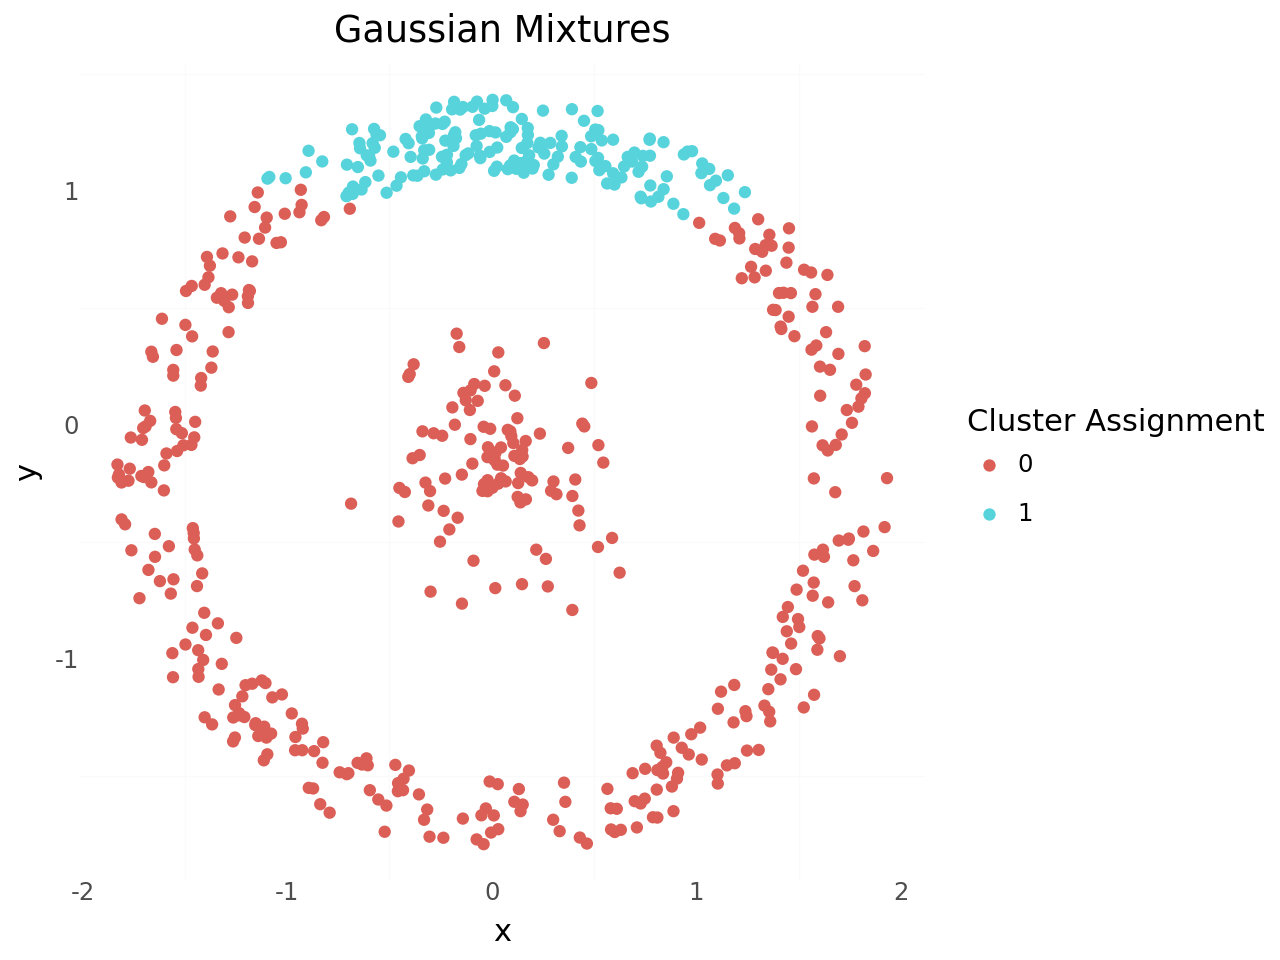

In [51]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
from plotnine import ggplot, aes, geom_point, theme_minimal, scale_color_discrete, theme, element_blank, labs


hac = AgglomerativeClustering(n_clusters=2)
km = KMeans(n_clusters=2, n_init=10)
gm = GaussianMixture(n_components=2)

hac.fit(d4[["x", "y"]])
km.fit(d4[["x", "y"]])
gm.fit(d4[["x", "y"]])


d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x", "y"]])


p1 = (
    ggplot(d4, aes(x="x", y="y", color="factor(hac)"))
    + geom_point()
    + theme_minimal()
    + scale_color_discrete(name="Cluster Assignment")
    + theme(panel_grid_major=element_blank())
    + labs(title="Hierarchical Agglomerative")
)


p2 = (
    ggplot(d4, aes(x="x", y="y", color="factor(km)"))
    + geom_point()
    + theme_minimal()
    + scale_color_discrete(name="Cluster Assignment")
    + theme(panel_grid_major=element_blank())
    + labs(title="KMeans")
)


p3 = (
    ggplot(d4, aes(x="x", y="y", color="factor(gm)"))
    + geom_point()
    + theme_minimal()
    + scale_color_discrete(name="Cluster Assignment")
    + theme(panel_grid_major=element_blank())
    + labs(title="Gaussian Mixtures")
)


display(p1)
display(p2)
display(p3)


## Dataset 5

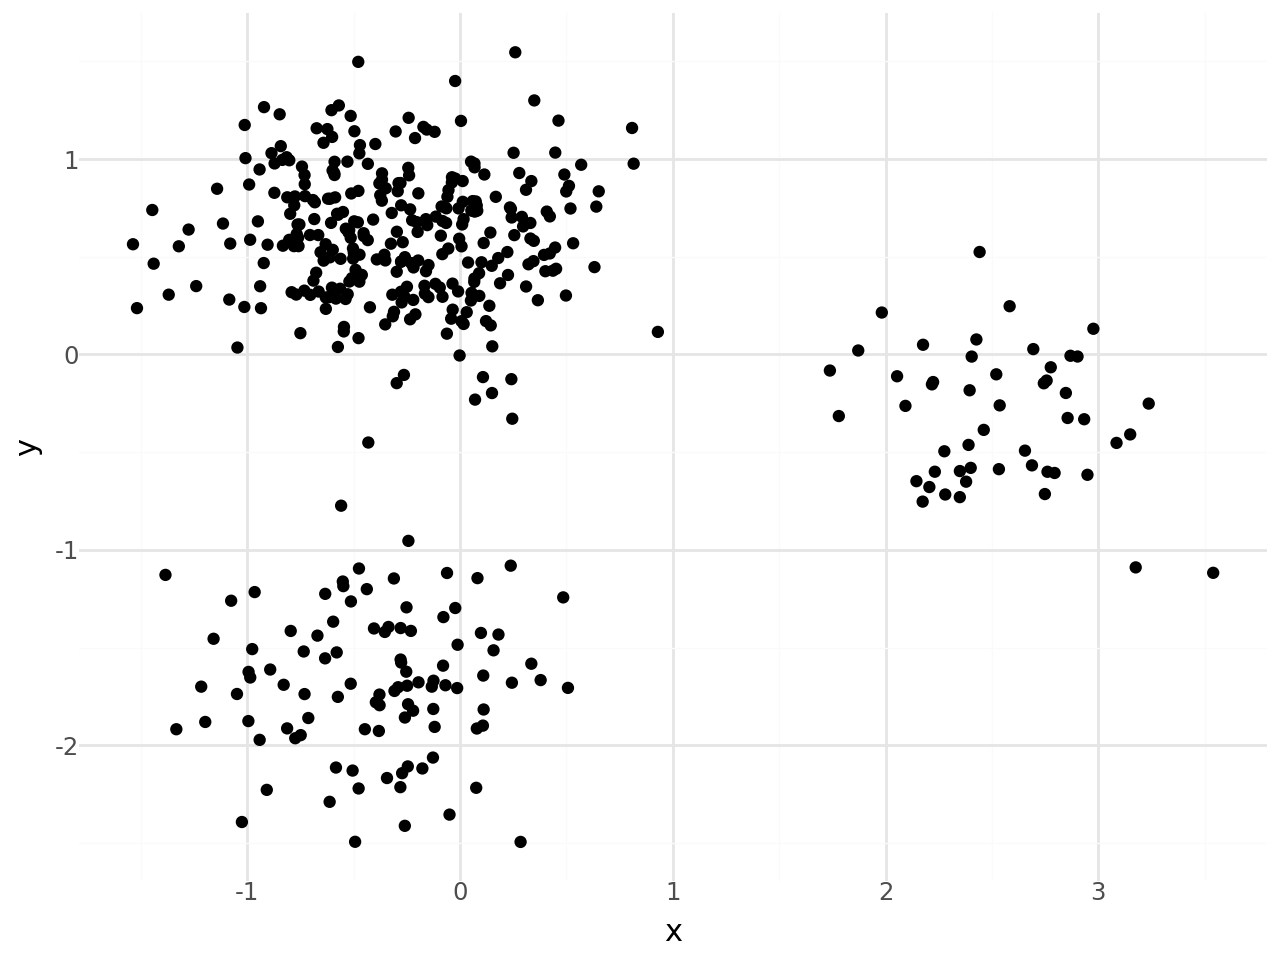

In [37]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")

z = StandardScaler()
d5[["x","y"]] = z.fit_transform(d5)

ggplot(d5, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

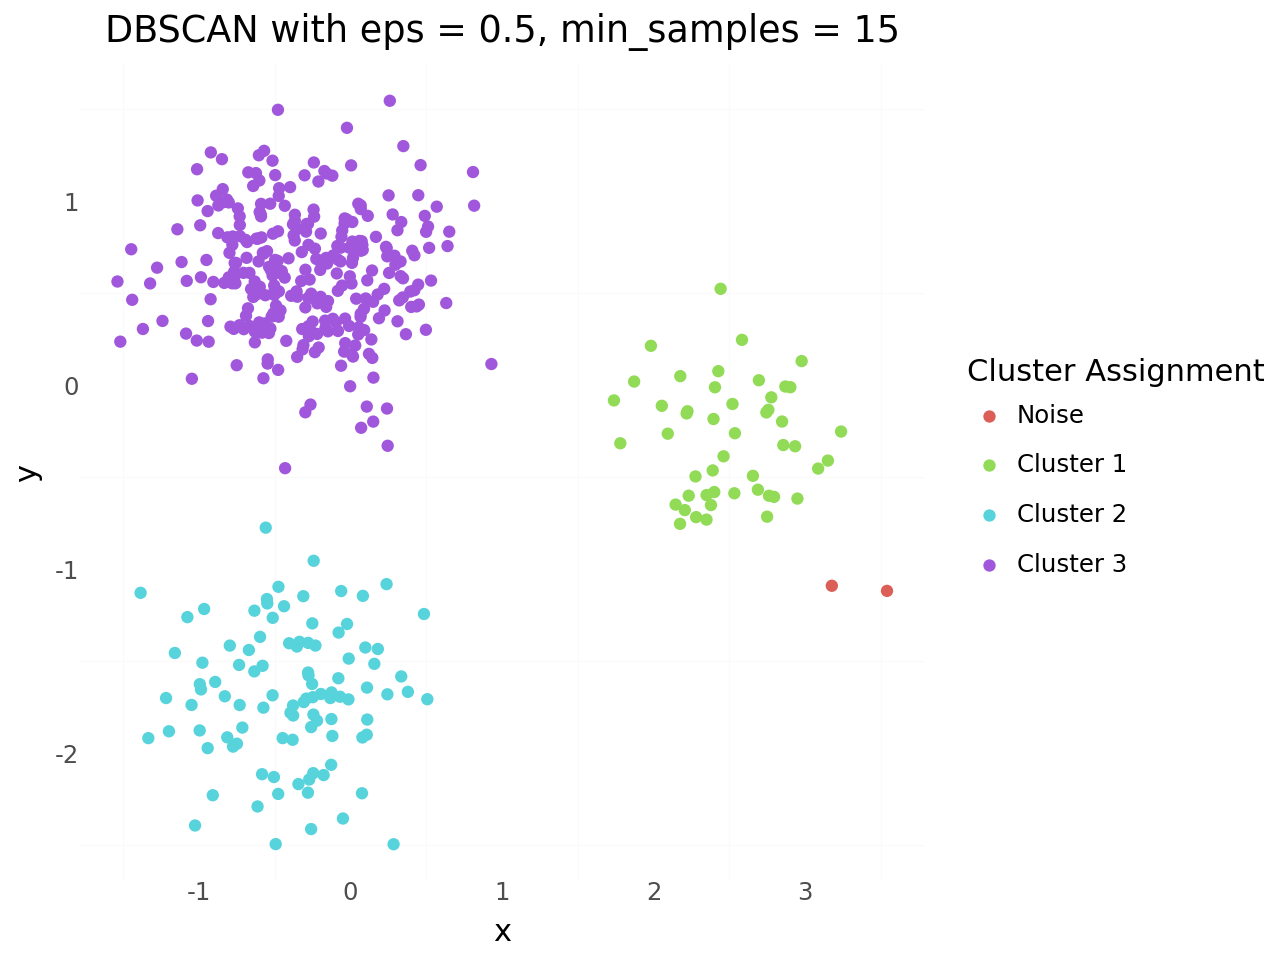

In [38]:
db5 = DBSCAN(eps = 0.5, min_samples = 15).fit(d5)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db5.labels_)))]

d5["assignments"] = db5.labels_

(ggplot(d5, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 15"))

In [39]:
# grab only clustered data points
d5_clustered = d5.loc[(d5.assignments >= 0)]

print(silhouette_score(d5_clustered[["x","y"]], d5_clustered["assignments"]))

# overall
print(silhouette_score(d5[["x","y"]], d5["assignments"]))

0.7048131054311416
0.6714107830551044


# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

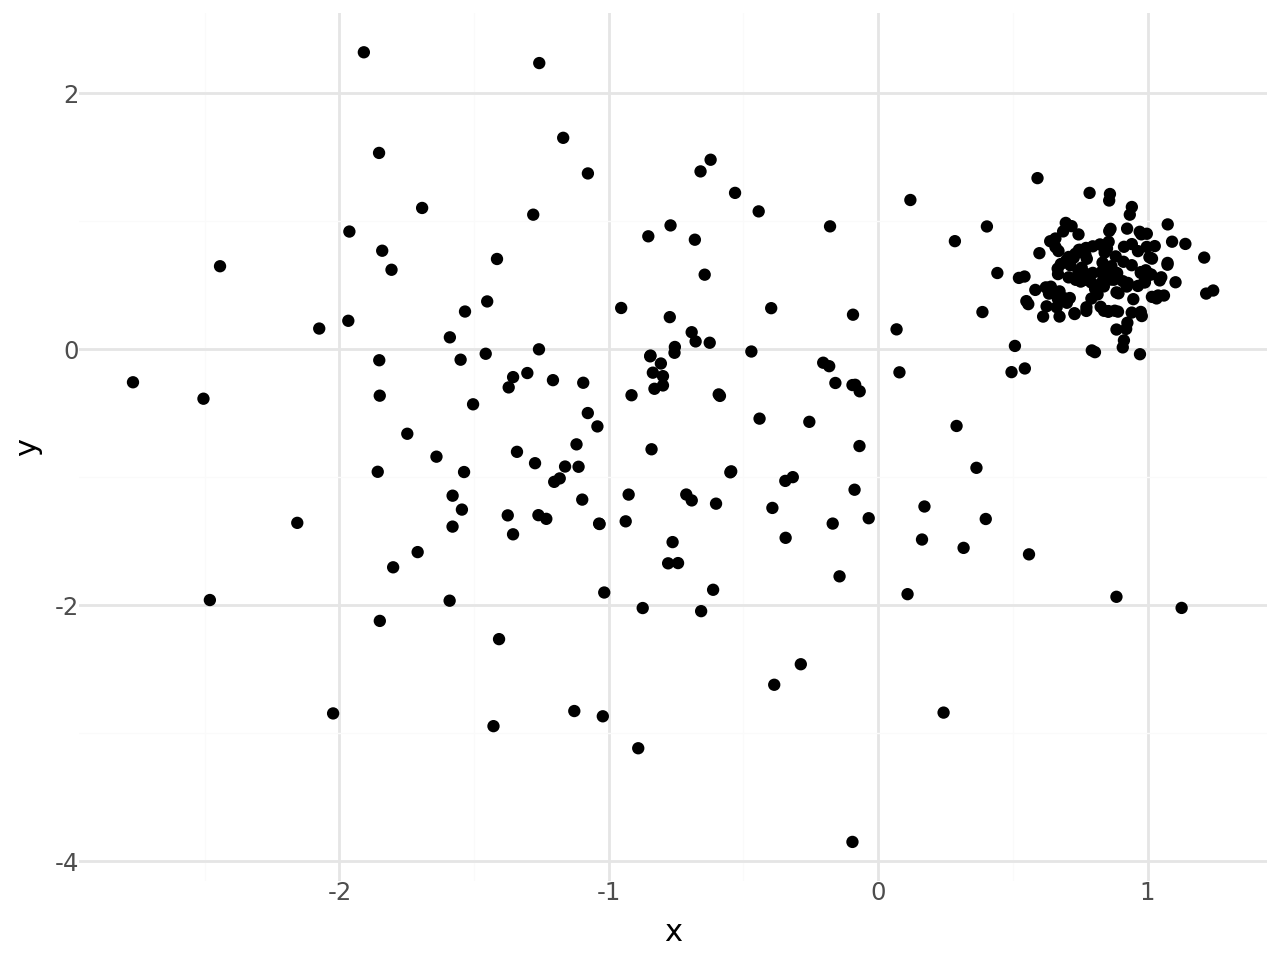

In [40]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")

z = StandardScaler()
d6[["x","y"]] = z.fit_transform(d6)

ggplot(d6, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

In [46]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 3
nn = NearestNeighbors(n_neighbors=mins + 1)

nn.fit(d6)

distances, neighbors = nn.kneighbors(d6)

distances

array([[0.        , 0.03690981, 0.04037236, 0.04597748],
       [0.        , 0.05516926, 0.08888159, 0.08986399],
       [0.        , 0.01648388, 0.02195778, 0.02314588],
       ...,
       [0.        , 0.06869733, 0.07309685, 0.07758794],
       [0.        , 0.78821453, 0.92003238, 1.06397712],
       [0.        , 0.3352202 , 0.35858311, 0.4012105 ]])

In [47]:
# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

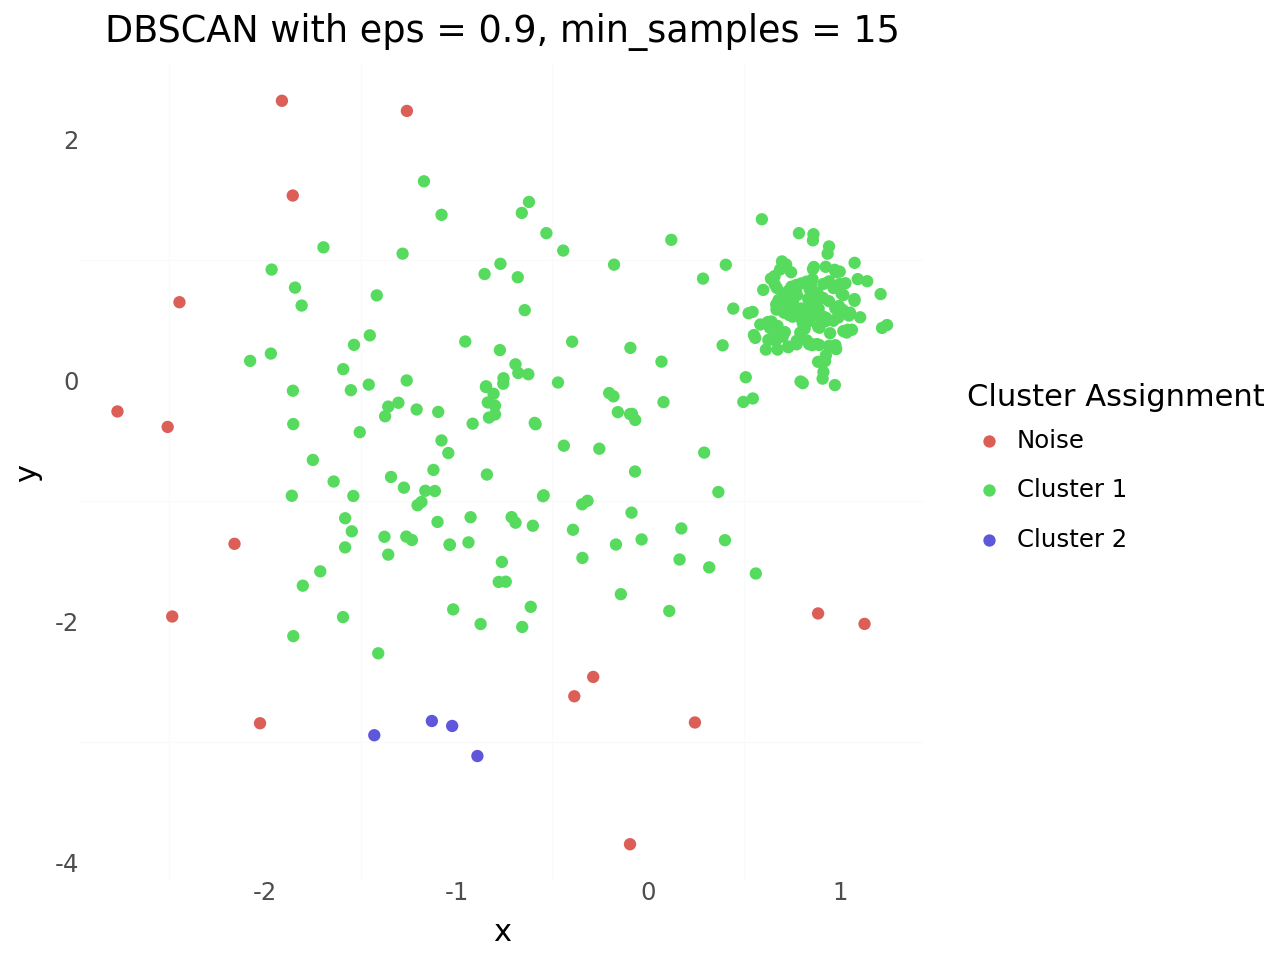

In [44]:
db6 = DBSCAN(eps = 0.45, min_samples = 3).fit(d6)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db6.labels_)))]

d6["assignments"] = db6.labels_

(ggplot(d6, aes(x = "x", y = "y", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = 0.9, min_samples = 15"))

In [45]:
# grab only clustered data points
d6_clustered = d6.loc[(d6.assignments >= 0)]

print(silhouette_score(d6_clustered[["x","y"]], d6_clustered["assignments"]))

# overall
print(silhouette_score(d6[["x","y"]], d6["assignments"]))

0.49007245503214775
0.396045290883704
